# Fallecimientos Covid 19 - MINSA PERU

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Cargando la data

In [2]:
df = pd.read_csv('fallecidos_covid.csv', sep=';')


C:\Users\danie\AppData\Local\Temp\ipykernel_23956\1026732960.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fallecidos_covid.csv', sep=';')


In [3]:
df.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20230222,20210512,88.0,FEMENINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889730.0
1,20230222,20210624,58.0,MASCULINO,Criterio SINADEF,AREQUIPA,AREQUIPA,PAUCARPATA,040112,13889749.0
2,20230222,20210426,84.0,MASCULINO,Criterio serolÃ³gico,LA LIBERTAD,SANCHEZ CARRION,CHUGAY,130902,13889932.0
3,20230222,20210315,64.0,MASCULINO,Criterio virolÃ³gico,LA LIBERTAD,SANTIAGO DE CHUCO,CACHICADAN,131003,13889956.0
4,20230222,20210504,62.0,MASCULINO,Criterio SINADEF,LIMA,HUARAL,CHANCAY,150605,13890034.0


## Analisis exploratorio de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219387 entries, 0 to 219386
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          219387 non-null  int64  
 1   FECHA_FALLECIMIENTO  219387 non-null  int64  
 2   EDAD_DECLARADA       219383 non-null  float64
 3   SEXO                 219387 non-null  object 
 4   CLASIFICACION_DEF    219387 non-null  object 
 5   DEPARTAMENTO         219387 non-null  object 
 6   PROVINCIA            219382 non-null  object 
 7   DISTRITO             219382 non-null  object 
 8   UBIGEO               219387 non-null  object 
 9   UUID                 216720 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 16.7+ MB


In [5]:
df['UUID'].isnull().sum()

2667

In [6]:
df.drop(columns=['UUID','UBIGEO','FECHA_CORTE'], axis=1, inplace= True)

In [7]:
df[['PROVINCIA', 'DISTRITO']] = df.groupby('DEPARTAMENTO')[['PROVINCIA', 'DISTRITO']].fillna(method='ffill')

In [8]:
df['EDAD_DECLARADA'] = df['EDAD_DECLARADA'].fillna(df['EDAD_DECLARADA'].median()) # fill null ages with median

In [9]:
# Creando grupos de edades
bins = [-1, 20, 40, 60, 80, np.inf]
labels = ['0-20', '21-40', '41-60', '61-80', '80+']
df['AGE_GROUP'] = pd.cut(df['EDAD_DECLARADA'], bins=bins, labels=labels)

Las fechas de codigos UUID nulos no fueron en un bloque de fechas, sino que estan esparcidos. No encuentro el motivo por el que algunos fallecimientos no tienen codigo UUID (anonimizacion) de la persona fallecida.

In [10]:
#Convertimos FECHA_CORTE y FECHA_FALLECIMIENTO a datetime.

df['FECHA_FALLECIMIENTO'] = pd.to_datetime(df['FECHA_FALLECIMIENTO'], format='%Y%m%d')


**Visualizando EDAD**

In [11]:
#Reivsamos las estadisticas en la columna edad
df['EDAD_DECLARADA'].describe()

count    219387.000000
mean         66.349310
std          15.844943
min           0.000000
25%          57.000000
50%          68.000000
75%          78.000000
max         114.000000
Name: EDAD_DECLARADA, dtype: float64

La edad promedio es 66. Veamos la distribucion de la misma variable.

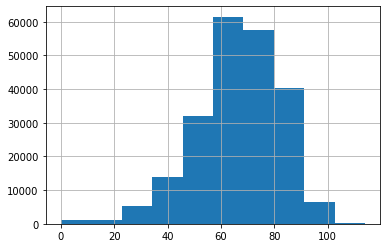

In [12]:
df['EDAD_DECLARADA'].hist()
plt.show()

**Visualizando cantidad de ocurrencias en el tiempo**


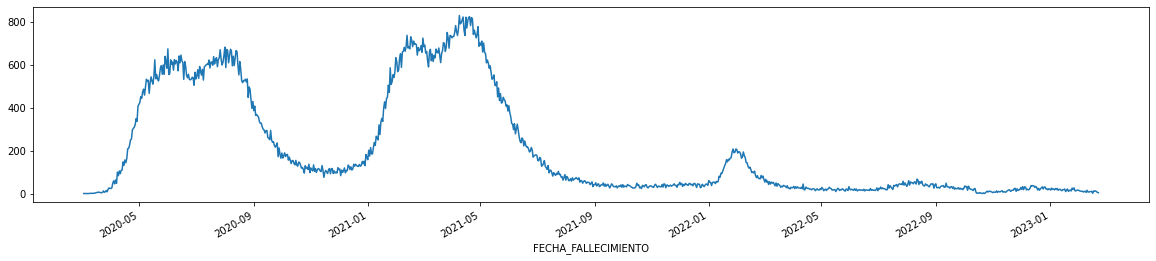

In [13]:
# Agrupar la data por fecha de fallecimiento y contar las ocurrencias
counts = df.groupby(df['FECHA_FALLECIMIENTO']).size()

# Visualizar las ocurrencias a lo largo del tiempo
counts.plot(figsize=(20,4))
plt.show()

**Visualizando variables categoricas**

In [14]:
#Revisamos las categorias en cada una de las columnas categoricas

def countplot_features(feature):
    fig = plt.figure(figsize=(10,8))
    plot=sns.countplot(x=feature,data=df)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

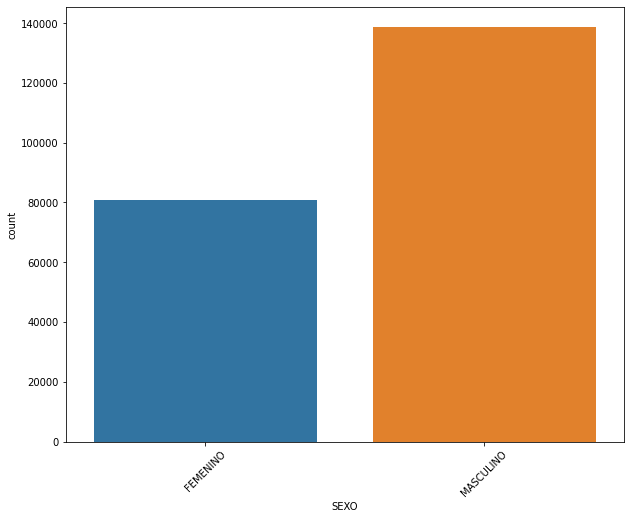

In [15]:
countplot_features('SEXO')

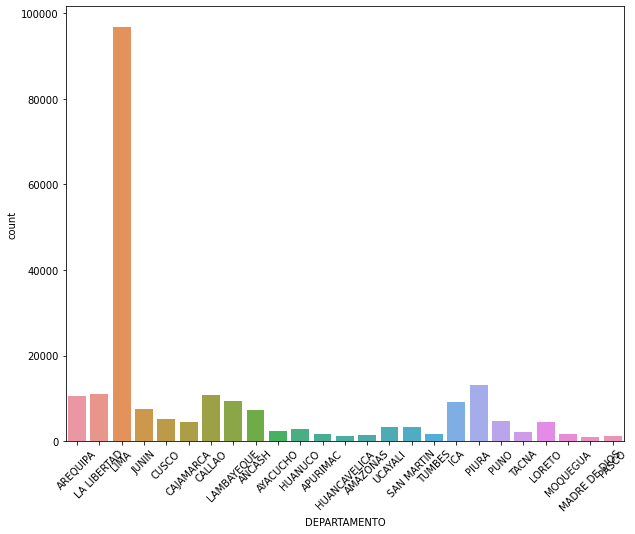

In [16]:
countplot_features('DEPARTAMENTO')

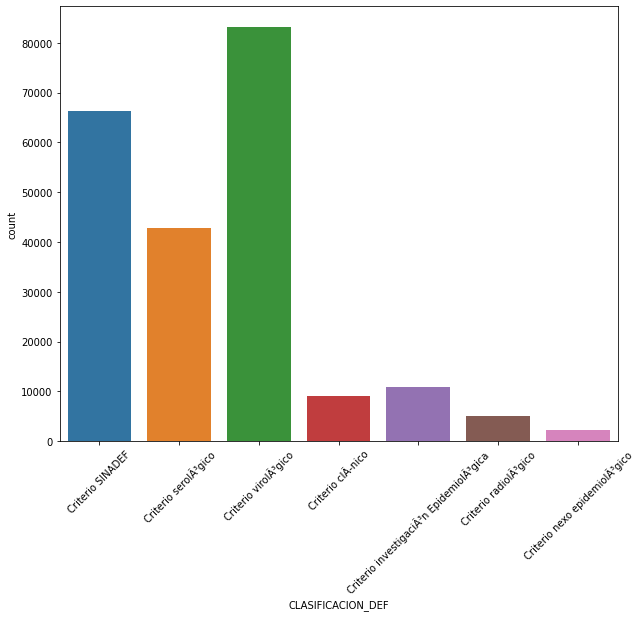

In [17]:
countplot_features('CLASIFICACION_DEF')

## Obteniendo valor de los datos

### Explorar la correlación entre densidad poblacional y ratio de fallecidos por COVID-19, por departamento.

In [18]:
# Creando diccionario de poblacion de cada departamento del Peru
# Creando diccionario de area de cada departamento del Peru

populations = {'AMAZONAS':403000, 'ANCASH':1052000, 'APURIMAC':427000, 'AREQUIPA':1150000, 'AYACUCHO':634000, 'CAJAMARCA':1370000, 'CALLAO':823000, 'CUSCO':1187000, 'HUANCAVELICA':462000, 'HUANUCO':746000, 'ICA':682000, 'JUNIN':1105000, 'LA LIBERTAD':1555000, 'LAMBAYEQUE':1099000, 'LIMA': 879000, 'LORETO':901000, 'MADRE DE DIOS':104000, 'MOQUEGUA':178000, 'PASCO':276000, 'PIURA':1657000, 'PUNO':1263000, 'SAN MARTIN':678000, 'TACNA':285000, 'TUMBES':204000, 'UCAYALI':415000}
areas = {'AMAZONAS':39249, 'ANCASH':35914, 'APURIMAC':20896, 'AREQUIPA':63345, 'AYACUCHO':43815, 'CAJAMARCA':33318, 'CALLAO':147, 'CUSCO':71986, 'HUANCAVELICA':22131, 'HUANUCO':36849, 'ICA':21328, 'JUNIN':37667, 'LA LIBERTAD':25500, 'LAMBAYEQUE':14231, 'LIMA': 34802, 'LORETO':368852, 'MADRE DE DIOS':85301, 'MOQUEGUA':15734, 'PASCO':25320, 'PIURA':35892, 'PUNO':66997, 'SAN MARTIN':51253, 'TACNA':16076, 'TUMBES':4046, 'UCAYALI':101831}

In [19]:
areas = {k: int(v) for k, v in areas.items()}

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219387 entries, 0 to 219386
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FECHA_FALLECIMIENTO  219387 non-null  datetime64[ns]
 1   EDAD_DECLARADA       219387 non-null  float64       
 2   SEXO                 219387 non-null  object        
 3   CLASIFICACION_DEF    219387 non-null  object        
 4   DEPARTAMENTO         219387 non-null  object        
 5   PROVINCIA            219387 non-null  object        
 6   DISTRITO             219387 non-null  object        
 7   AGE_GROUP            219387 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 11.9+ MB


In [21]:
# Paso 1: Calcular la población y densidad poblacional
pop_df = pd.DataFrame.from_dict(populations, orient='index', columns=['POPULATION'])
pop_df['AREA'] = pop_df.index.map(areas) # add area column
pop_df['POP_DENSITY'] = pop_df['POPULATION'] / pop_df['AREA'] # calculate population density

# Paso 2: Combinar data de población y data de densidad poblacional
df_merged = pd.merge(df, pop_df, left_on='DEPARTAMENTO', right_index=True)


In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219387 entries, 0 to 219348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FECHA_FALLECIMIENTO  219387 non-null  datetime64[ns]
 1   EDAD_DECLARADA       219387 non-null  float64       
 2   SEXO                 219387 non-null  object        
 3   CLASIFICACION_DEF    219387 non-null  object        
 4   DEPARTAMENTO         219387 non-null  object        
 5   PROVINCIA            219387 non-null  object        
 6   DISTRITO             219387 non-null  object        
 7   AGE_GROUP            219387 non-null  category      
 8   POPULATION           219387 non-null  int64         
 9   AREA                 219387 non-null  int64         
 10  POP_DENSITY          219387 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 18.6+ MB


In [56]:
# Agrupar el dataframe por departamento
dept_df = df_merged.groupby('DEPARTAMENTO').agg(
    total_deaths=('EDAD_DECLARADA', 'count'),
    total_population=('POPULATION', 'max'),
    density=('POP_DENSITY', 'max')
)

# Calcular el ratio de fallecidos
dept_df['death_rate'] = (dept_df['total_deaths'] / dept_df['total_population'])*100000

In [53]:
colors = []
for _, row in dept_df.iterrows():
    if row['death_rate'] < 0.04 and row['density'] < 100:
        colors.append('green')
    else:
        colors.append('red')

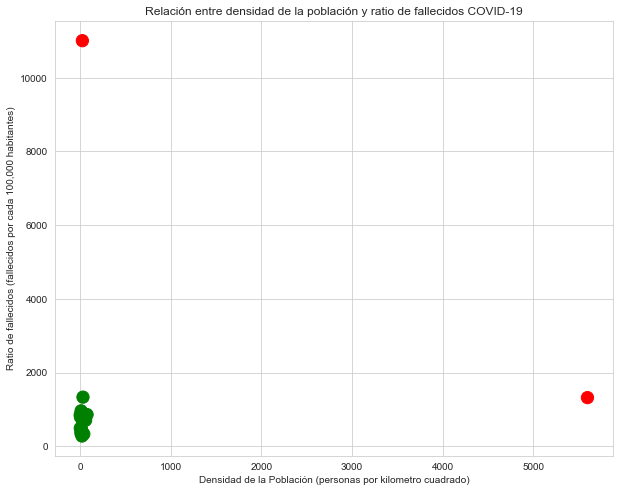

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dept_df['density'], dept_df['death_rate'], s=150, c=colors)
plt.title('Relación entre densidad de la población y ratio de fallecidos COVID-19')
plt.xlabel('Densidad de la Población (personas por kilometro cuadrado)')
plt.ylabel('Ratio de fallecidos (fallecidos por cada 100,000 habitantes)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df_merged['POP_DENSITY'], df_merged['death_rate'], s=50)

ax.set_xlabel('Population Density')
ax.set_ylabel('Death Rate')

plt.show()

Si la mayoría de los puntos están agrupados en la esquina inferior izquierda, significa que hay una débil o no hay correlación entre densidad poblacional y ratio de fallecimiento en el dataset.Sin embargo, es importante notar que un scatterplot es solo una representación visual de la data y no puede definitivamente probar o no probar una correlación.

Valdría la pena investigar el valor extremo que aparece en la esquina superior izquierda, ya que sugiere que puede haber otro factor en juego que está influenciando el ratio de fallecidos COVID-19 en ese departamento. Similarmente, el valor extremo en la esquina inferior derecha también valdría la pena investigar ya que sugiere que puede haber un departmento con una alta densidad poblacional y alto ratio de fallecimiento COVID-19.

En resumen, mientras que el scatterplot puede que no muestre una fuerte correlación entre densidad poblacional y ratio de fallecimiento COVID-19, puede ser útil aún identificar valores atípicos o extremos y realizar una mayor investigación sobre factores potenciales que puedan estar influyendo en la data.

In [28]:
# Encontrar el departamento con la mayor densidad poblacional
max_density_dept = dept_df['density'].idxmax()

In [29]:
print('Department with max density:', max_density_dept)

Department with max density: CALLAO


In [30]:
# Encontrar el departamento con el mayor ratio de fallecimiento
max_death_rate_dept = dept_df['death_rate'].idxmax()

In [31]:
print('Department with max death rate:', max_death_rate_dept)

Department with max death rate: LIMA


### Muertes por genero, grupo de edad y fecha de fallecimiento



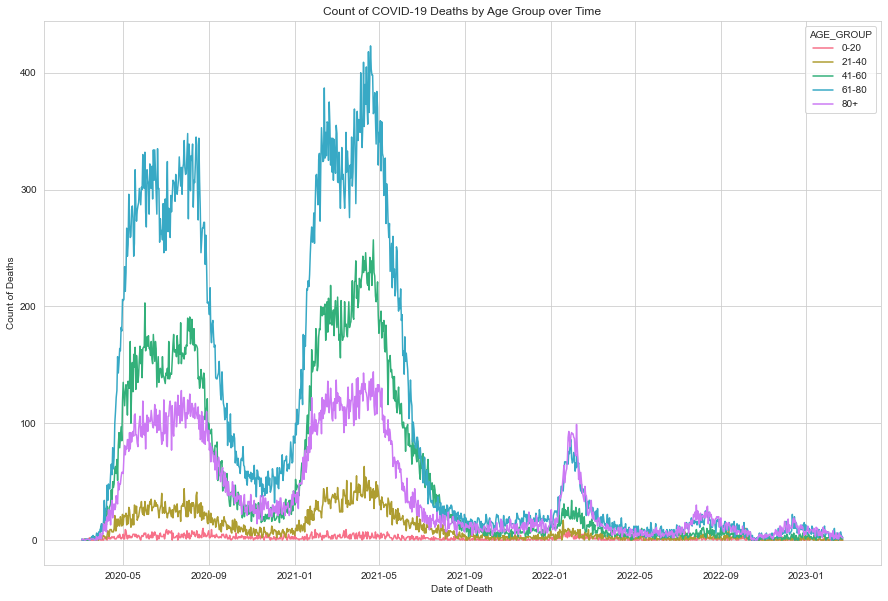

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table
df_pivot = pd.pivot_table(df, values='EDAD_DECLARADA', index=['FECHA_FALLECIMIENTO'], columns='AGE_GROUP', aggfunc='count')

# Reshape data with melt
df_melt = df_pivot.reset_index().melt(id_vars=['FECHA_FALLECIMIENTO'], var_name='AGE_GROUP', value_name='DEATH_COUNT')

# Create stacked area plot
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_palette("husl", 5)
sns.lineplot(data=df_melt, x='FECHA_FALLECIMIENTO', y='DEATH_COUNT', hue='AGE_GROUP', estimator='sum', ci=None)
plt.title('Count of COVID-19 Deaths by Age Group over Time')
plt.xlabel('Date of Death')
plt.ylabel('Count of Deaths')
plt.show()

<Figure size 1080x720 with 0 Axes>

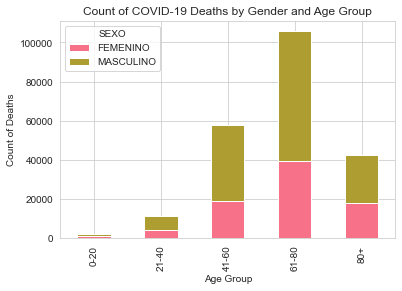

In [34]:
# Group by age group and gender, and count the number of deaths
df_grouped = df.groupby(['AGE_GROUP', 'SEXO'])['EDAD_DECLARADA'].count().reset_index()
df_grouped = df_grouped.rename(columns={'EDAD_DECLARADA': 'DEATH_COUNT'})

# Pivot the table to have age group as the index and gender as the columns, and fill the missing values with 0
df_pivot = df_grouped.pivot(index='AGE_GROUP', columns='SEXO', values='DEATH_COUNT')

# Create stacked bar chart
plt.figure(figsize=(15, 10))
df_pivot.plot(kind='bar', stacked=True)
plt.title('Count of COVID-19 Deaths by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Deaths')
plt.show()